<a href="https://colab.research.google.com/github/MUTTA-ISIGI/ARTIFICIAL-INTELLIGENCE/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **STATEMENT PROBLEM**

## **IMAGE CLASSIFICATION: FashionMNIST**

## In order to categorize outfits and apparel from simply photos during the production process, visual analysis challenges are typically encountered in the fashion business. The visual inspection of the various results of a designer's work, which are stored in a collecting bucket before moving on to categorization, is the most crucial step to do in order to establish efficient marketing plans.

## Our immediate strategy in this project is to investigate how Deep Learning techniques like Convolutional Neural Networks (CNN) and Natural Language Processing (NLP) can be used to classify Fashion MNIST photos.

## **PURPOSE OF THE PROJECT**

## The major objectives of this project are to educate ourselves on the complexities of CNN and NLP, to grasp and explain them, and to gain recognition for our efforts as a team.

## In order to optimize for more insights, the project includes background information.

## **EXPLORATION OF DATA**

## Importing the libraries needed for this classification project allows us to begin exploring the data.

In [ ]:
import torchvision
import torch
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import itertools
import torch.optim as optim
import time
import torch.nn as nn
import torch.nn.functional as F
torch.set_printoptions(linewidth=120)
from tqdm import tqdm
%matplotlib inline

## More classes drawn from several libraries.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC
from torch import nn,optim,no_grad
import time
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)



## **Loading data from torchvision - CNN**

## The DataLoader is then used to preprocess the images.

In [ ]:
train_set1 = torchvision.datasets.FashionMNIST("./data", download=True, train=True, transform=
                                                transforms.Compose([transforms.ToTensor()]))
test_set1 = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=
                                               transforms.Compose([transforms.ToTensor()]))  

## How many samples you'll feed in a single batch. As a result, training takes less time.

## Data from the train and test sets are split at random via a shuffle.

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set1, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set1, batch_size=64, shuffle=True)

Our data set contains 60000 images and the number of images we are testing is 10000.

In [ ]:
print('Training data length : ', len(train_set1))

print('Testing data length : ', len(test_loader))

Training data length :  60000
Testing data length :  157


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## **DATA VISUALIZATION**

## Python has built-in functions for working with iterables, such as next() and iter(). The __iter__() method on the iterable is called throughout the execution of a for loop, and the resulting iterator is then passed through the __next__() method until the end of the iterator is reached. After that, the loop ends and it raises a stopIteration.

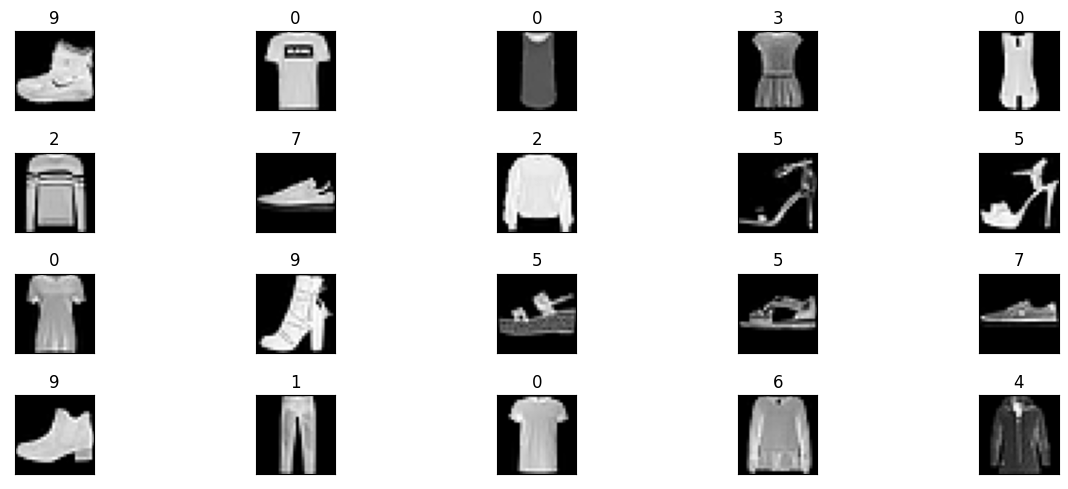

In [ ]:
sample_images = torch.utils.data.DataLoader(train_set1, batch_size=64)

batch = next(iter(sample_images))
images, labels = batch

fig =plt.figure(figsize=(15,5))
for idx in range(20):
  ax = fig.add_subplot(4, 20/4, idx+1,xticks = [],yticks = [])
  ax.imshow(np.squeeze(images[idx]),cmap = "gray")

  ax.set_title(labels[idx].item())
  fig.tight_layout()


## This dataset contains 10 different styles of clothing.

In [ ]:

output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }


## Mapping 20 images with their respective labels.

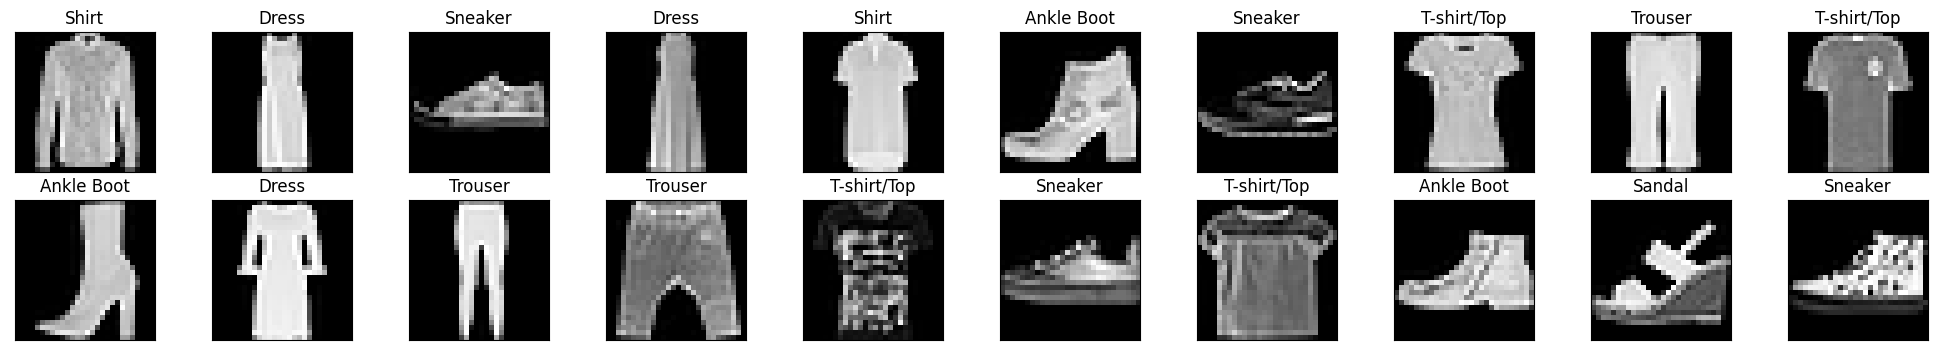

In [ ]:
images,labels=next(iter(train_loader))
fig=plt.figure(figsize=(25,4))
for i in range(1,21):
    ax=fig.add_subplot(2,10,i,xticks=[],yticks=[])
    ax.imshow(images[i].view(28,28),cmap='gray')
    ax.set_title(str(output_mapping[labels[i].item()]))

## **FUTURE ENGINEERING**

## Feature engineering is the process of employing statistical or machine learning techniques to transform unprocessed information into desired characteristics. A machine learning technique called feature engineering uses data to generate new variables that aren't present in the training set. With the aim of streamlining and accelerating data transformations while also improving model accuracy, it can generate new features for both supervised and unsupervised learning.

In [ ]:
sample=list(iter(test_loader))
images,labels=sample[0]
images,labels=sample[1]

## **MODELING**

## The development, training, and application of machine learning algorithms that simulate logical decision-making based on accessible facts are known as modeling. Advanced intelligence approaches including real-time analytics, predictive analytics, and augmented analytics are supported by Ml algorithms, which act as a foundation.

In [ ]:
def get_item(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

@torch.no_grad() 
def get_all_preds(network, dataloader):
    all_preds = torch.tensor([])
    model = network
    for batch in dataloader:
        images, labels = batch
        preds = model(images) 
        all_preds = torch.cat((all_preds, preds), dim=0)
        
    return all_preds

## Defining the confusion matrix.

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(15, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


## **Modelling with MLP**

In [ ]:
class FashionMLP(nn.Module):
    def __init__(self):
        super(FashionMLP,self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512,512)
        self.fc3 = nn.Linear(512,10)
        self.droput = nn.Dropout(0.2)
        
    def forward(self,x):
        x = x.view(-1,28*28)
        x = F.relu(self.fc1(x))
        x = self.droput(x)
        x = F.relu(self.fc2(x))
        x = self.droput(x)
        x = self.fc3(x)
        return F.log_softmax(x, dim =1)

## **Hyperameters - LR and loss function**

## In order to go toward a loss function minimum, an optimization algorithm's learning rate controls the step size at each iteration.

## How successfully your machine learning algorithm predicts the featured data set is assessed using the loss function.

## We are using an optimizer SGD, with a learning rate of 0.001 using the MLP model.

In [ ]:
#learning rate 0.001 and lss is SGD
MLPmodel1 = FashionMLP()

error1 = nn.CrossEntropyLoss()

learning_rate1 = 0.001
optim = torch.optim.SGD(MLPmodel1.parameters(),lr = learning_rate1)
print(MLPmodel1)

FashionMLP(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (droput): Dropout(p=0.2, inplace=False)
)


## We are using an optimizer Adam, with a learning rate of 0.005 using the MLP model.

In [ ]:
#learning rate 0.005 and lss is Adam
MLPmodel2 = FashionMLP()

error2 = nn.CrossEntropyLoss()

learning_rate = 0.005
optimizer = torch.optim.Adam(MLPmodel2.parameters(), lr=learning_rate)
print(MLPmodel2)

FashionMLP(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (droput): Dropout(p=0.2, inplace=False)
)


## **TRAINING**

## We employ an optimizer repeatedly throughout training in order to obtain the correct response. An optimizer is a set of algorithms or techniques used to modify the neural network's weights and learning rate in order to minimize losses.

## Epoch is the total number of cycles that all of the training data go through in order to train a machine learning model.

# Traing the MLP model using a learning rate 0.001 and an optimizer SGD to get the highest accuracy.

## Accuracy increased to 78.8%

In [ ]:
#Training model with params (lr = 0.001,optimizer = SGD)
epochs = 30
highest_accuracy = 0

for epoch in range(epochs):
    start_time = time.time()
    total_correct = 0
    total_loss = 0
    for batch in train_loader:
        imgs, lbls = batch
        preds = MLPmodel1(imgs) 
        loss = error1(preds, lbls) 
        optim.zero_grad() 
        loss.backward()  
        optim.step() 
        
    for batch in test_loader:
        imgs, lbls = batch
        preds = MLPmodel1(imgs)
        total_loss += loss.item()
        total_correct += get_item(preds, lbls)
        accuracy = (total_correct/len(test_set1)) * 100
        
    end_time = time.time() - start_time    
    print("Epoch no.",epoch+1 ,"| Validation accuracy: ",round(accuracy,0),"%", "| total_correct: ", total_correct,"/10000" ,"| epoch_dura: ", end_time,"sec")
    
    if accuracy >= highest_accuracy:
        print('Validation Accuracy increased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        highest_accuracy,
        accuracy))
        torch.save(MLPmodel1.state_dict(), 'MLPmodel1.pt')
        highest_accuracy = accuracy

Epoch no. 1 | Validation accuracy:  40.0 % | total_correct:  3964 /10000 | epoch_dura:  18.270832777023315 sec
Validation Accuracy increased (0.000000 --> 39.640000).  Saving model ...
Epoch no. 2 | Validation accuracy:  55.0 % | total_correct:  5488 /10000 | epoch_dura:  10.53849720954895 sec
Validation Accuracy increased (39.640000 --> 54.880000).  Saving model ...
Epoch no. 3 | Validation accuracy:  57.0 % | total_correct:  5727 /10000 | epoch_dura:  10.595007181167603 sec
Validation Accuracy increased (54.880000 --> 57.270000).  Saving model ...
Epoch no. 4 | Validation accuracy:  60.0 % | total_correct:  5973 /10000 | epoch_dura:  10.703791618347168 sec
Validation Accuracy increased (57.270000 --> 59.730000).  Saving model ...
Epoch no. 5 | Validation accuracy:  61.0 % | total_correct:  6140 /10000 | epoch_dura:  10.664180278778076 sec
Validation Accuracy increased (59.730000 --> 61.400000).  Saving model ...
Epoch no. 6 | Validation accuracy:  64.0 % | total_correct:  6374 /10000

## Traing the MLP model using a learning rate 0.005 and an optimizer Adam to get the highest accuracy.

## Accuracy increased to 85%

In [ ]:
#Training model with params (lr = 0.005,optimizer = Adam)
epochs = 30
highest_accuracy = 0

for epoch in range(epochs):
    start_time = time.time()
    total_correct = 0
    total_loss = 0

    for batch in train_loader:
        imgs, lbls = batch
        preds = MLPmodel2(imgs) 
        loss = error1(preds, lbls) 
        optimizer.zero_grad() 
        loss.backward()  
        optimizer.step() 
        
    for batch in test_loader:
        imgs, lbls = batch
        preds = MLPmodel2(imgs)
        total_loss += loss.item()
        total_correct += get_item(preds, lbls)
        accuracy = (total_correct/len(test_set1)) * 100
        
    end_time = time.time() - start_time    
    print("Epoch no.",epoch+1 ,"| Validation accuracy: ",round(accuracy,0),"%", "| total_correct: ", total_correct,"/10000" ,"| epoch_dura: ", end_time,"sec")
    
    if accuracy >= highest_accuracy:
        print('Validation Accuracy increased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        highest_accuracy,
        accuracy))
        torch.save(MLPmodel2.state_dict(), 'MLPmodel2.pt')
        highest_accuracy = accuracy

Epoch no. 1 | Validation accuracy:  81.0 % | total_correct:  8051 /10000 | epoch_dura:  16.339831352233887 sec
Validation Accuracy increased (0.000000 --> 80.510000).  Saving model ...
Epoch no. 2 | Validation accuracy:  82.0 % | total_correct:  8210 /10000 | epoch_dura:  21.200761318206787 sec
Validation Accuracy increased (80.510000 --> 82.100000).  Saving model ...
Epoch no. 3 | Validation accuracy:  81.0 % | total_correct:  8132 /10000 | epoch_dura:  21.191591262817383 sec
Epoch no. 4 | Validation accuracy:  84.0 % | total_correct:  8444 /10000 | epoch_dura:  21.513025045394897 sec
Validation Accuracy increased (82.100000 --> 84.440000).  Saving model ...
Epoch no. 5 | Validation accuracy:  82.0 % | total_correct:  8201 /10000 | epoch_dura:  21.141414165496826 sec
Epoch no. 6 | Validation accuracy:  83.0 % | total_correct:  8314 /10000 | epoch_dura:  21.19477677345276 sec
Epoch no. 7 | Validation accuracy:  84.0 % | total_correct:  8423 /10000 | epoch_dura:  21.07499599456787 sec
E

In [ ]:
MLPmodel1.load_state_dict(torch.load('MLPmodel1.pt'))
MLPmodel2.load_state_dict(torch.load('MLPmodel2.pt'))

<All keys matched successfully>

## **MLP Model1 (LR = 0.001, Loss = SGD) Confusion Matrix**

## Plotting the confusion matrix graph using a learning rate of 0.001 and an optimizer SGD, 

## We found an accuracy of 0.789 and a mismatch of 0.2108

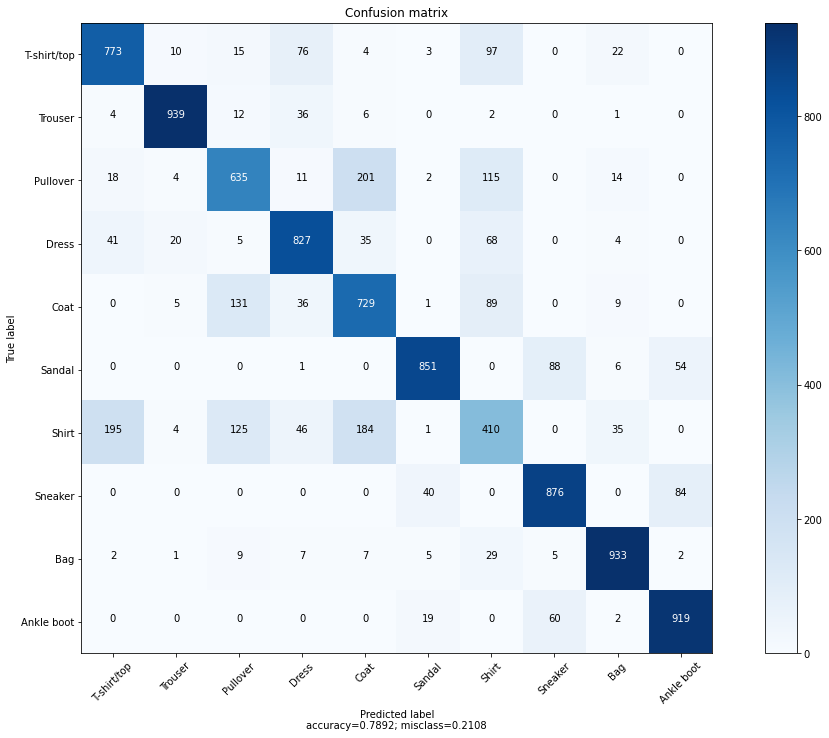

In [ ]:
pred_data_loader = torch.utils.data.DataLoader(batch_size=1000, dataset=test_set1, num_workers=2)
all_preds= get_all_preds(network=MLPmodel1, dataloader=pred_data_loader) 
plot_confusion_matrix(cm=confusion_matrix(y_true=test_set1.targets, y_pred=all_preds.argmax(1)), target_names=test_set1.classes, normalize=False)

## **MLP Model2 (LR = 0.005, Loss = Adam) Confusion Matrix**

## Plotting the confusion matrix graph using a learning rate of 0.005 and an optimizer Adam,

## We found an accuracy of 0.8526 and a mismatch of 0.1474, More efficient than the first MLP model

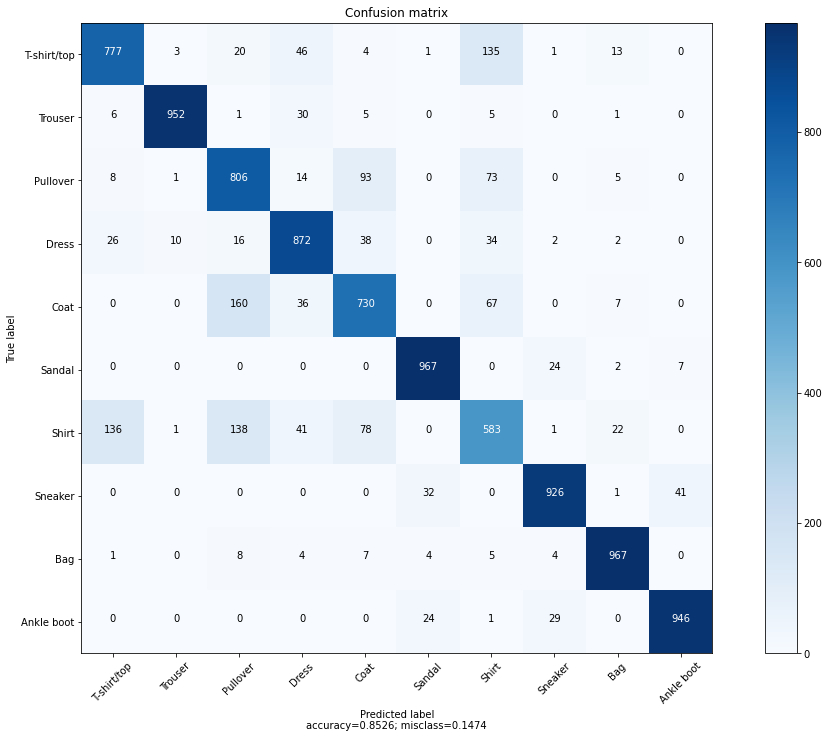

In [ ]:
pred_data_loader = torch.utils.data.DataLoader(batch_size=1000, dataset=test_set1, num_workers=2)
all_preds= get_all_preds(network=MLPmodel2, dataloader=pred_data_loader) 
plot_confusion_matrix(cm=confusion_matrix(y_true=test_set1.targets, y_pred=all_preds.argmax(1)), target_names=test_set1.classes, normalize=False)

## **Modelling with CNN**

## The CNN model invovles 3 layers: Input Layer, HIdden layer and the Output layer. The input layer receives the images, while the hidden layer performs most of the computation and involves other layers such as the CNN layer, pooling layer and the flattening layer, and finally the output layer which gives the image predictions.

## Input layer module tf.reshape reshapes and shapes the tensor

### CNN uses an activation function RELU.

In [ ]:
class FashionCNN(nn.Module):
    
    def __init__(self):
        super(FashionCNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out

## **Hyperameters - LR and loss function**

## We using the SAM optimizer as well as SGD and Adam.

In [ ]:
import torch
class SAM(torch.optim.Optimizer):
    def __init__(self, params, base_optimizer, rho=0.05, adaptive=False, **kwargs):
        assert rho >= 0.0, f"Invalid rho, should be non-negative: {rho}"

        defaults = dict(rho=rho, adaptive=adaptive, **kwargs)
        super(SAM, self).__init__(params, defaults)

        self.base_optimizer = base_optimizer(self.param_groups, **kwargs)
        self.param_groups = self.base_optimizer.param_groups
        self.defaults.update(self.base_optimizer.defaults)

    @torch.no_grad()
    def first_step(self, zero_grad=False):
        grad_norm = self._grad_norm()
        for group in self.param_groups:
            scale = group["rho"] / (grad_norm + 1e-12)

            for p in group["params"]:
                if p.grad is None: continue
                self.state[p]["old_p"] = p.data.clone()
                e_w = (torch.pow(p, 2) if group["adaptive"] else 1.0) * p.grad * scale.to(p)
                p.add_(e_w)  # climb to the local maximum "w + e(w)"

        if zero_grad: self.zero_grad()

    @torch.no_grad()
    def second_step(self, zero_grad=False):
        for group in self.param_groups:
            for p in group["params"]:
                if p.grad is None: continue
                p.data = self.state[p]["old_p"]  # get back to "w" from "w + e(w)"

        self.base_optimizer.step()  # do the actual "sharpness-aware" update

        if zero_grad: self.zero_grad()

    @torch.no_grad()
    def step(self, closure=None):
        assert closure is not None, "Sharpness Aware Minimization requires closure, but it was not provided"
        closure = torch.enable_grad()(closure)  # the closure should do a full forward-backward pass

        self.first_step(zero_grad=True)
        closure()
        self.second_step()

    def _grad_norm(self):
        shared_device = self.param_groups[0]["params"][0].device  # put everything on the same device, in case of model parallelism
        norm = torch.norm(
                    torch.stack([
                        ((torch.abs(p) if group["adaptive"] else 1.0) * p.grad).norm(p=2).to(shared_device)
                        for group in self.param_groups for p in group["params"]
                        if p.grad is not None
                    ]),
                    p=2
               )
        return norm

    def load_state_dict(self, state_dict):
        super().load_state_dict(state_dict)
        self.base_optimizer.param_groups = self.param_groups


## CNN model with a learnimng rate of 0.001 and Optimizer SAM and ADAM.

In [ ]:
#learning rate 0.001 and loss function is Adam
CNNmodel1 = FashionCNN() # init model
error1 = nn.CrossEntropyLoss()

learning_rate1 = 0.1
base_optimizer = torch.optim.Adam
optimizer1 = SAM(CNNmodel1.parameters(),base_optimizer, lr=learning_rate1)

print(CNNmodel1) # print model structure

NameError: ignored

## CNN model with learning rate of 0.005 and an optimizer SGD.

In [ ]:
#learning rate 0.005 and loss function is SGD
CNNmodel3 = FashionCNN()

error2 = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(CNNmodel3.parameters(), lr=learning_rate)

print(CNNmodel3)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


## **TRAINING**

## Training the CNN model with a base optimizer Adam and optimizer SAM with a learning rate of 0.001 and an Epoch of 30.

In [ ]:
#Training model with params (lr = 0.001,base_optimizer = Adam,optimizer = SAM)
epochs = 30
highest_accuracyCNN1 = 0

for epoch in range(epochs):
    CNNmodel1.train()

    start_time = time.time()
    total_correct = 0
    total_loss = 0

    #first forward-backward pass
    for batch in train_loader:
        imgs, lbls = batch
        preds = CNNmodel1(imgs) 
        loss = error1(preds,lbls) 
        loss.mean().backward() 
        optimizer1.first_step(zero_grad = True)

    #second forward-backward pass
        imgs, lbls = batch
        preds = CNNmodel1(imgs) 
        error1(preds,lbls).backward() 
        optimizer1.second_step(zero_grad = True)

        with torch.no_grad():
                total_correct += get_item(preds, lbls)
           
    CNNmodel1.eval()
    with torch.no_grad():
        for batch in test_loader:
              imgs, lbls = batch
              preds = CNNmodel1(imgs) 
              total_correct += get_item(preds, lbls)
              accuracy = (total_correct/len(test_set1)) * 100
        
    end_time = time.time() - start_time    
    print("Epoch no.",epoch+1 ,"| Validation accuracy: ",round(accuracy,0),"%", "| total_correct: ", total_correct,"/10000" ,"| epoch_dura: ", end_time,"sec")
    
    if accuracy >= highest_accuracyCNN1:
        print('Accuracy increased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        highest_accuracyCNN1,
        accuracy))
        torch.save(CNNmodel1.state_dict(), 'CNNmodel1.pt')
        highest_accuracyCNN1 = accuracy

Epoch no. 1 | Validation accuracy:  67.0 % | total_correct:  6744 /10000 | epoch_dura:  136.34592819213867 sec
Accuracy increased (0.000000 --> 67.440000).  Saving model ...
Epoch no. 2 | Validation accuracy:  62.0 % | total_correct:  6165 /10000 | epoch_dura:  147.14527130126953 sec
Epoch no. 3 | Validation accuracy:  62.0 % | total_correct:  6238 /10000 | epoch_dura:  146.84366846084595 sec
Epoch no. 4 | Validation accuracy:  65.0 % | total_correct:  6459 /10000 | epoch_dura:  147.2971761226654 sec
Epoch no. 5 | Validation accuracy:  65.0 % | total_correct:  6522 /10000 | epoch_dura:  146.46144843101501 sec
Epoch no. 6 | Validation accuracy:  63.0 % | total_correct:  6254 /10000 | epoch_dura:  147.24299550056458 sec
Epoch no. 7 | Validation accuracy:  63.0 % | total_correct:  6329 /10000 | epoch_dura:  146.969824552536 sec
Epoch no. 8 | Validation accuracy:  65.0 % | total_correct:  6512 /10000 | epoch_dura:  146.4374041557312 sec
Epoch no. 9 | Validation accuracy:  64.0 % | total_co

## Training the CNN model2 with an optimizer SGD, learning rate 0.005.

In [ ]:
#Training model with params (lr = 0.005,optimizer = SGD)
epochs = 30
highest_accuracyCNN2 = 0

for epoch in range(epochs):
    start_time = time.time()
    total_correct = 0
    total_loss = 0
    for batch in train_loader:
        imgs, lbls = batch
        preds = CNNmodel2(imgs) 
        loss = error2(preds, lbls) 
        optim.zero_grad() 
        loss.backward()  
        optim.step() 

    for batch in test_loader:
        imgs, lbls = batch
        preds = CNNmodel2(imgs)
        total_loss += loss.item()
        total_correct += get_item(preds, lbls)
        accuracy = (total_correct/len(test_set1)) * 100
        
    end_time = time.time() - start_time    
    print("Epoch no.",epoch+1 ,"| Validation accuracy: ",round(accuracy,0),"%", "| total_correct: ", total_correct,"/10000" ,"| epoch_dura: ", end_time,"sec")
    
    if accuracy >= highest_accuracyCNN2:
        print('Accuracy increased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        highest_accuracyCNN2,
        accuracy))
        torch.save(CNNmodel2.state_dict(), 'CNNmodel2.pt')
        highest_accuracy = accuracy

## CNN model3 training with a learning rate 0.001 and otimizer Adam.

## An accuracy of 91% is obtained.

In [ ]:
#Training model with params (lr = 0.001,optimizer = Adam)
epochs = 30
highest_accuracy = 0

for epoch in range(epochs):
    start_time = time.time()
    total_correct = 0
    total_loss = 0
    for batch in train_loader:
        imgs, lbls = batch
        preds = CNNmodel3(imgs) 
        loss = error2(preds, lbls) 
        optimizer.zero_grad() 
        loss.backward()  
        optimizer.step() 

    for batch in test_loader:
        imgs, lbls = batch
        preds = CNNmodel3(imgs)
        total_loss += loss.item()
        total_correct += get_item(preds, lbls)
        accuracy = (total_correct/len(test_set1)) * 100
        
    end_time = time.time() - start_time    
    print("Epoch no.",epoch+1 ,"| accuracy: ", accuracy,"%", "| total_correct: ", total_correct,"/10000" ,"| epoch_dura: ", end_time,"sec")
    
    if accuracy >= highest_accuracy:
        print('Accuracy increased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        highest_accuracy,
        accuracy))
        torch.save(CNNmodel3.state_dict(), 'CNNmodel3.pt')
        highest_accuracy = accuracy

Epoch no. 1 | accuracy:  88.41 % | total_correct:  8841 /10000 | epoch_dura:  103.23786163330078 sec
Accuracy increased (0.000000 --> 88.410000).  Saving model ...
Epoch no. 2 | accuracy:  88.58 % | total_correct:  8858 /10000 | epoch_dura:  100.76476550102234 sec
Accuracy increased (88.410000 --> 88.580000).  Saving model ...
Epoch no. 3 | accuracy:  90.53 % | total_correct:  9053 /10000 | epoch_dura:  100.25896286964417 sec
Accuracy increased (88.580000 --> 90.530000).  Saving model ...
Epoch no. 4 | accuracy:  91.19 % | total_correct:  9119 /10000 | epoch_dura:  100.37694096565247 sec
Accuracy increased (90.530000 --> 91.190000).  Saving model ...
Epoch no. 5 | accuracy:  91.45 % | total_correct:  9145 /10000 | epoch_dura:  103.35600590705872 sec
Accuracy increased (91.190000 --> 91.450000).  Saving model ...


KeyboardInterrupt: ignored

In [ ]:
# CNNmodel1.load_state_dict(torch.load('CNNmodel1.pt'))
# CNNmodel2.load_state_dict(torch.load('CNNmodel2.pt'))
CNNmodel3.load_state_dict(torch.load('CNNmodel91.pt'))
CNNmodel3

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)

## CNN model3 with a base optimizer SGD and an optimizer SAM with a learning rate of 0.001.

In [ ]:
model = CNNmodel3
model
epochs = 5
base_optimizer = torch.optim.SGD
learning_rate = 0.1
optimizer = SAM(model.parameters(), base_optimizer,lr=learning_rate, momentum=0.9)

for epoch in range(epochs):
        total_correct = 0
        model.train()
        for batch in train_loader:
          inputs, targets = batch

            # first forward-backward step
          predictions = model(inputs)
          loss = error1(predictions, targets)
          loss.mean().backward()
          optimizer.first_step(zero_grad=True)

          # second forward-backward step
          error1(model(inputs), targets).mean().backward()
          optimizer.second_step(zero_grad=True)

          with torch.no_grad():
            total_correct += get_item(preds, lbls)
        
        model.eval()

        with torch.no_grad():
          for batch in test_loader:
            inputs, targets = batch
            predictions = model(inputs)
            loss = error1(predictions, targets)
            total_correct += get_item(preds, lbls)
            accuracy = (total_correct/len(test_set1)) * 100
            print(accuracy)

## **CNN Model2 (LR = 0.001, Loss = Adam) Confusion Matrix**

In [ ]:
pred_data_loader = torch.utils.data.DataLoader(batch_size=64, dataset=test_set1, num_workers=2)
all_preds= get_all_preds(network=CNNmodel1, dataloader=pred_data_loader) 
plot_confusion_matrix(cm=confusion_matrix(y_true=test_set1.targets, y_pred=all_preds.argmax(1)), target_names=test_set1.classes, normalize=False)

In [ ]:
pred_data_loader = torch.utils.data.DataLoader(batch_size=1000, dataset=test_set1, num_workers=2)
all_preds= get_all_preds(network=CNNmodel2, dataloader=pred_data_loader) 
plot_confusion_matrix(cm=confusion_matrix(y_true=test_set1.targets, y_pred=all_preds.argmax(1)), target_names=test_set1.classes, normalize=False)

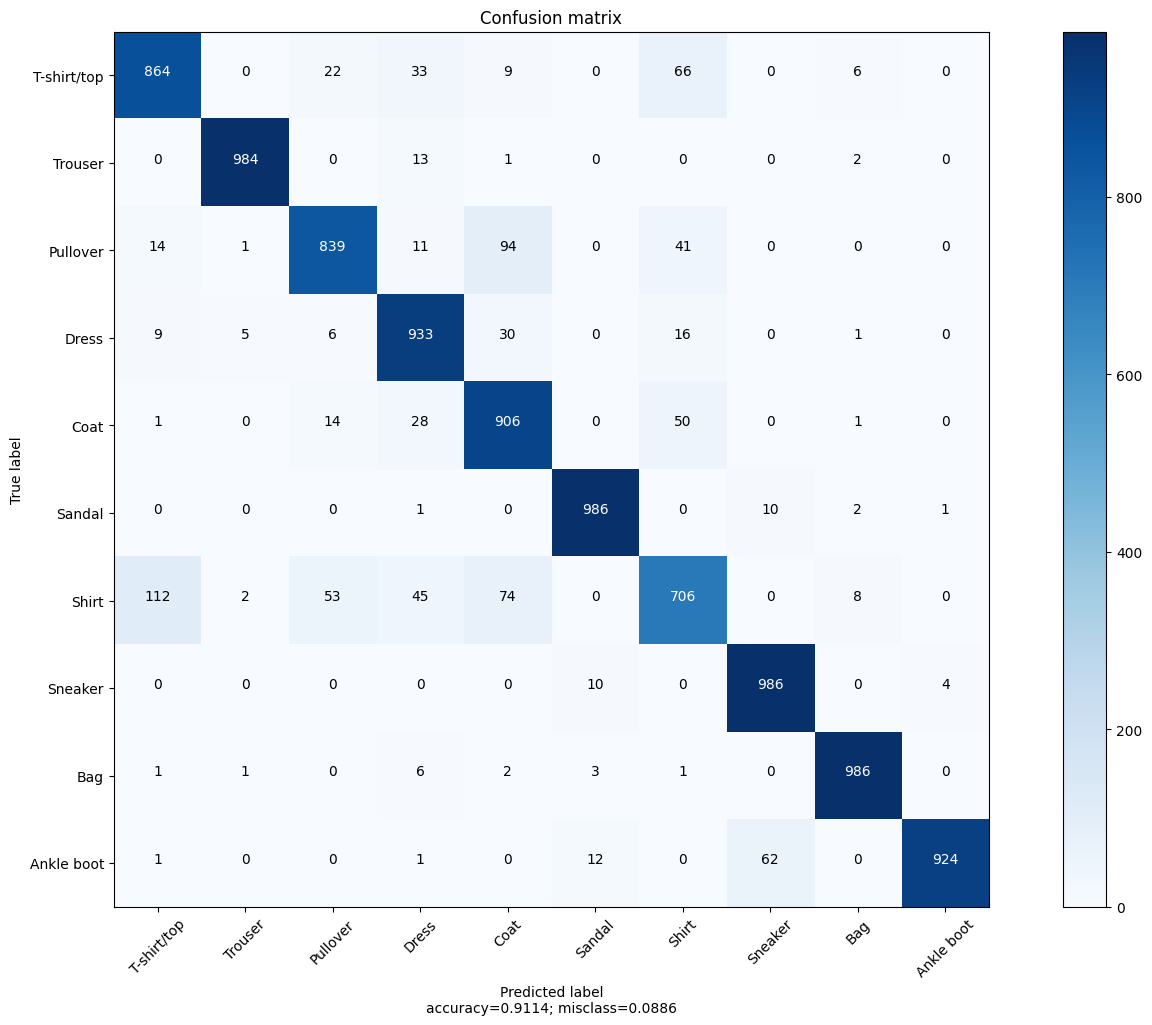

In [ ]:
pred_data_loader = torch.utils.data.DataLoader(batch_size=1000, dataset=test_set1, num_workers=1)
all_preds= get_all_preds(network=CNNmodel3, dataloader=pred_data_loader) 
plot_confusion_matrix(cm=confusion_matrix(y_true=test_set1.targets, y_pred=all_preds.argmax(1)), target_names=test_set1.classes, normalize=False)

In [ ]:
import torch
class SAM(torch.optim.Optimizer):
    def __init__(self, params, base_optimizer, rho=0.05, adaptive=False, **kwargs):
        assert rho >= 0.0, f"Invalid rho, should be non-negative: {rho}"

        defaults = dict(rho=rho, adaptive=adaptive, **kwargs)
        super(SAM, self).__init__(params, defaults)

        self.base_optimizer = base_optimizer(self.param_groups, **kwargs)
        self.param_groups = self.base_optimizer.param_groups
        self.defaults.update(self.base_optimizer.defaults)

    @torch.no_grad()
    def first_step(self, zero_grad=False):
        grad_norm = self._grad_norm()
        for group in self.param_groups:
            scale = group["rho"] / (grad_norm + 1e-12)

            for p in group["params"]:
                if p.grad is None: continue
                self.state[p]["old_p"] = p.data.clone()
                e_w = (torch.pow(p, 2) if group["adaptive"] else 1.0) * p.grad * scale.to(p)
                p.add_(e_w)  # climb to the local maximum "w + e(w)"

        if zero_grad: self.zero_grad()

    @torch.no_grad()
    def second_step(self, zero_grad=False):
        for group in self.param_groups:
            for p in group["params"]:
                if p.grad is None: continue
                p.data = self.state[p]["old_p"]  # get back to "w" from "w + e(w)"

        self.base_optimizer.step()  # do the actual "sharpness-aware" update

        if zero_grad: self.zero_grad()

    @torch.no_grad()
    def step(self, closure=None):
        assert closure is not None, "Sharpness Aware Minimization requires closure, but it was not provided"
        closure = torch.enable_grad()(closure)  # the closure should do a full forward-backward pass

        self.first_step(zero_grad=True)
        closure()
        self.second_step()

    def _grad_norm(self):
        shared_device = self.param_groups[0]["params"][0].device  # put everything on the same device, in case of model parallelism
        norm = torch.norm(
                    torch.stack([
                        ((torch.abs(p) if group["adaptive"] else 1.0) * p.grad).norm(p=2).to(shared_device)
                        for group in self.param_groups for p in group["params"]
                        if p.grad is not None
                    ]),
                    p=2
               )
        return norm

    def load_state_dict(self, state_dict):
        super().load_state_dict(state_dict)
        self.base_optimizer.param_groups = self.param_groups


## **STREAMLIT**

In [ ]:
!pip install -q pyngrok

!pip install -q streamlit

!pip install -q streamlit_ace

!pip install -U ipykernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 145 kB 7.4 MB/s 
     |████████████████████████████████| 761 kB 53.4 MB/s 
     |████████████████████████████████| 423 kB 72.8 MB/s 
     |████████████████████████████████| 386 kB 61.3 MB/s 
     |████████████████████████████████| 1.6 MB 37.3 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 6.0.4
    Uninstalling tornado-6.0.4:
      Successfully uninstalled tornado-6.0.4
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 2.0.10
    Uninstalling prompt-toolkit-2.0.10:
      Successfully uninstalled prompt-toolkit-2.0.10
  Attempting uninstall: ipython
    Found existing installation: ipython 7.9.0
    Uninstalling ipython-7.9.0:
      Successfully uninstalled ipython-7.9.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.3.4
    Uninstalling ipykernel-5.3

In [ ]:
# saving the model 
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(CNNmodel3, pickle_out) 
pickle_out.close()

In [ ]:
%%writefile app.py
 
import pickle
import streamlit as st
 
# loading the trained model
pickle_in = open('classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)

PAGE_CONFIG = {"page_title":"StColab.io","page_icon":":smiley:","layout":"centered"}
st.beta_set_page_config(**PAGE_CONFIG)
def main():
	st.title("Awesome Streamlit for ML")
	st.subheader("How to run streamlit from colab")
	menu = ["Home","About"]
	choice = st.sidebar.selectbox('Menu',menu)
	if choice == 'Home':
		st.subheader("Streamlit From Colab")	
if __name__ == '__main__':
	main()
 

Overwriting app.py


In [ ]:
!ls

app.py		CNNmodel1.pt  CNNmodel3.pt   data
classifier.pkl	CNNmodel2.pt  CNNmodel91.pt  sample_data


In [ ]:
!streamlit run app.py &>/dev/null&


In [ ]:
from pyngrok import ngrok
# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(port='8501')
public_url

<NgrokTunnel: "http://2126-34-125-101-111.ngrok.io" -> "http://localhost:80">

In [ ]:
ter